# ============================================================
# 📘 Python Warm-up & Brownian Motion Simulation 总结笔记
# ============================================================
# 作者: Chang Xu
# 说明: 本Notebook包含从Taylor展开、算法效率对比、
#       随机游走(Random Walk)到几何布朗运动(GBM)的完整练习。
# ============================================================

In [6]:
# 导入常用库
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Taylor series expansion

In [2]:
import math # needed for factorial

def taylor_sin(x, n):
    """Calculate sin(x) using Taylor series expansion to order n"""
    result = 0
    for i in range(n+1):
        # Term in Taylor series: (-1)^i * x^(2i+1) / (2i+1)!
        term = ((-1)**i * x**(2*i + 1)) / math.factorial(2*i + 1)
        result += term
    return result

# Calculate sin(0.1) to order 5
x = 0.1
order = 5
result = taylor_sin(x, order)

print(f"sin({x}) expanded to order {order} = {result:.25f}")
print(f"Actual value of sin({x}) = {math.sin(x):.25f}")

sin(0.1) expanded to order 5 = 0.0998334166468281686279695
Actual value of sin(0.1) = 0.0998334166468281547501817


# 埃拉托斯特尼筛法 (Sieve of Eratosthenes)

In [3]:
def get_primes(N):
    """返回小于N的所有素数"""
    is_prime = [True] * N
    is_prime[0] = is_prime[1] = False
    for i in range(2, int(N**0.5) + 1):
        if is_prime[i]:
            for j in range(i*i, N, i):
                is_prime[j] = False
    return [i for i in range(N) if is_prime[i]]

N = 121
print(f"小于 {N} 的素数有：{get_primes(N)}")


小于 121 的素数有：[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113]


# Recamán 序列

In [4]:
def recaman_sequence(N):
    """生成前N项Recaman序列"""
    seq = [0]
    for i in range(1, N):
        prev = seq[-1]
        next_val = prev - i
        if next_val > 0 and next_val not in seq:
            seq.append(next_val)
        else:
            seq.append(prev + i)
    return seq

print("前10项 Recaman 序列：", recaman_sequence(10))


前10项 Recaman 序列： [0, 1, 3, 6, 2, 7, 13, 20, 12, 21]


# 两个随机列表的公共元素比较

In [7]:
# 两种实现：低效(O(N²)) 与 高效(O(N))
def inefficient_common_elements(list1, list2):
    common = []
    for a in list1:
        for b in list2:
            if a == b and a not in common:
                common.append(a)
    return common

def efficient_common_elements(list1, list2):
    # set(list1) 会把 list1 转换成一个 集合对象。集合是一种 无序、元素唯一 的数据结构。
    # 在 Python 中，& 是集合的 交集运算符。它会返回同时存在于两个集合中的元素。
    return list(set(list1) & set(list2))

# 生成随机列表
N = 10
list1 = random.sample(range(1, N*2), N)
list2 = random.sample(range(1, N*2), N)
print("List1:", list1)
print("List2:", list2)
print("公共元素:", efficient_common_elements(list1, list2))


List1: [3, 1, 14, 9, 12, 5, 11, 19, 6, 8]
List2: [11, 12, 16, 14, 13, 1, 18, 7, 9, 15]
公共元素: [1, 9, 11, 12, 14]


# Exercise 1.5扩展：效率对比图

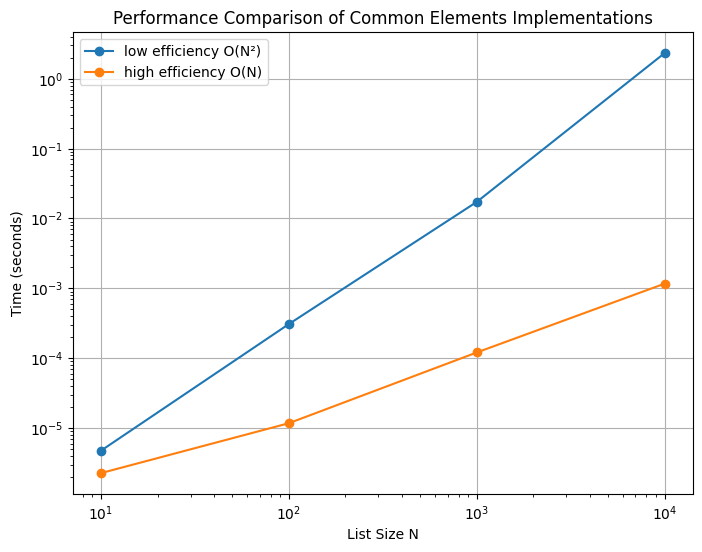

In [10]:
N_values = [10, 100, 1000, 10000]
num_runs = 10
inefficient_mean, efficient_mean = [], []

for N in N_values:
    list1 = random.sample(range(1, N*2), N)
    list2 = random.sample(range(1, N*2), N)

    # 低效算法平均耗时
    t1 = []
    for _ in range(num_runs):
        start = time.time()
        inefficient_common_elements(list1, list2)
        t1.append(time.time() - start)
    inefficient_mean.append(np.mean(t1))

    # 高效算法平均耗时
    t2 = []
    for _ in range(num_runs):
        start = time.time()
        efficient_common_elements(list1, list2)
        t2.append(time.time() - start)
    efficient_mean.append(np.mean(t2))

plt.figure(figsize=(8,6))
plt.loglog(N_values, inefficient_mean, 'o-', label="low efficiency O(N²)")
plt.loglog(N_values, efficient_mean, 'o-', label="high efficiency O(N)")
plt.xlabel("List Size N")
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison of Common Elements Implementations")
plt.grid(True)
plt.legend()
plt.show()


# 列出 362880 的因数对

In [12]:
n = 362880
factor_pairs = [(i, n // i) for i in range(1, int(n**0.5)+1) if n % i == 0]
print(f"362880 的因数对共有 {len(factor_pairs)} 个：")
print(factor_pairs[:15], "...")


362880 的因数对共有 80 个：
[(1, 362880), (2, 181440), (3, 120960), (4, 90720), (5, 72576), (6, 60480), (7, 51840), (8, 45360), (9, 40320), (10, 36288), (12, 30240), (14, 25920), (15, 24192), (16, 22680), (18, 20160)] ...


# 随机游走 (Random Walk)

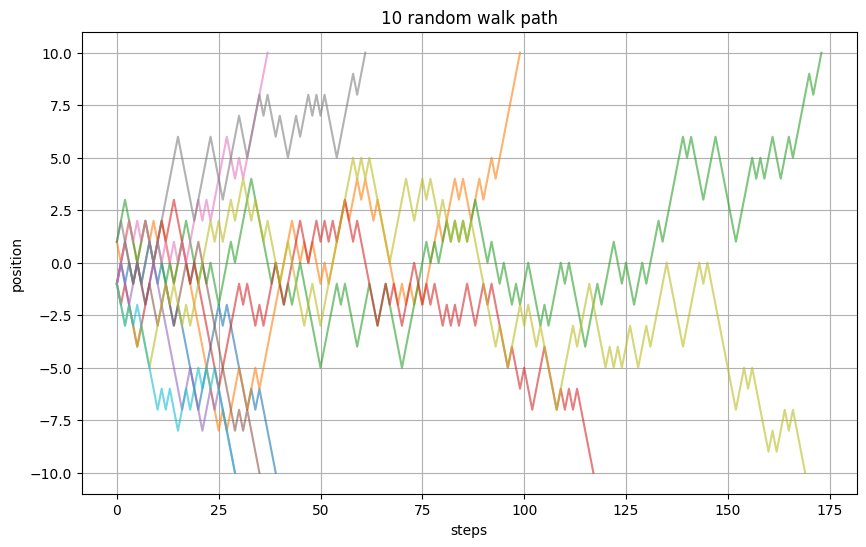

In [14]:
def random_walk():
    """步长为1的随机游走，直到位移达到±10"""
    position = 0
    while abs(position) < 10:
        step = 1 if random.randint(0, 1) else -1
        position += step
        yield position

# 绘制10条随机路径
plt.figure(figsize=(10,6))
for i in range(10):
    path = list(random_walk())
    plt.plot(range(len(path)), path, alpha=0.6)
plt.xlabel("steps")
plt.ylabel("position")
plt.title("10 random walk path")
plt.grid(True)
plt.show()


# 附加：计算路径间的协方差与相关性

In [15]:
# 用Pandas存储并对比10条路径的统计关系
paths = []
for i in range(10):
    path = list(random_walk())
    paths.append(pd.Series(path, name=f'Path{i+1}'))

df = pd.concat(paths, axis=1)
display(df.head())
display(df.corr().round(3))


,Path1,Path2,Path3,Path4,Path5,Path6,Path7,Path8,Path9,Path10
0,-1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,-1.0,1.0
1,0.0,2.0,0.0,0.0,0.0,0,2.0,2.0,0.0,2.0
2,-1.0,1.0,-1.0,-1.0,-1.0,-1,3.0,1.0,1.0,3.0
3,-2.0,0.0,0.0,-2.0,0.0,0,4.0,2.0,2.0,2.0
4,-1.0,1.0,1.0,-3.0,1.0,1,3.0,1.0,1.0,1.0


,Path1,Path2,Path3,Path4,Path5,Path6,Path7,Path8,Path9,Path10
Path1,1.000,-0.745,0.821,-0.712,0.676,0.471,-0.883,-0.882,0.798,-0.562
Path2,-0.745,1.000,-0.324,0.346,-0.057,-0.726,0.503,0.565,-0.652,-0.109
Path3,0.821,-0.324,1.000,-0.570,0.715,0.208,-0.820,-0.802,0.703,-0.539
Path4,-0.712,0.346,-0.570,1.000,-0.256,-0.246,0.317,0.838,-0.498,0.277
Path5,0.676,-0.057,0.715,-0.256,1.000,-0.579,0.241,-0.470,0.879,-0.855
Path6,0.471,-0.726,0.208,-0.246,-0.579,1.000,-0.590,-0.477,-0.148,0.598
Path7,-0.883,0.503,-0.820,0.317,0.241,-0.590,1.000,0.802,-0.700,-0.492
Path8,-0.882,0.565,-0.802,0.838,-0.470,-0.477,0.802,1.000,-0.623,0.340
Path9,0.798,-0.652,0.703,-0.498,0.879,-0.148,-0.700,-0.623,1.000,-0.796
Path10,-0.562,-0.109,-0.539,0.277,-0.855,0.598,-0.492,0.340,-0.796,1.000


# 实现：GBM模拟类

In [18]:
class GBMSimulator:
    """几何布朗运动模拟器"""
    def __init__(self, y0, mu, sigma):
        self.y0 = y0
        self.mu = mu
        self.sigma = sigma

    def simulate_path(self, T, N):
        """解析解模拟GBM路径"""
        dt = T / N
        t_values = np.linspace(0, T, N+1)
        W = np.random.standard_normal(N)
        W = np.insert(np.cumsum(np.sqrt(dt)*W), 0, 0)
        Y = self.y0 * np.exp((self.mu - 0.5*self.sigma**2)*t_values + self.sigma*W)
        return t_values, Y

    def plot_path(self, t_values, y_values):
        plt.plot(t_values, y_values, label="GBM Path")
        plt.xlabel("time t")
        plt.ylabel("Y(t)")
        plt.title("GBM Oath")
        plt.grid(True)
        plt.legend()
        plt.show()


# 运行GBM模拟并绘图

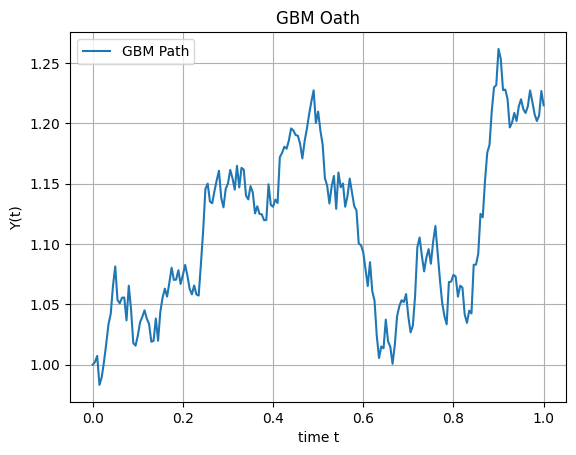

In [19]:
# 参数设置
y0 = 1.0
mu = 0.05
sigma = 0.2
T = 1.0
N = 200

sim = GBMSimulator(y0, mu, sigma)
t, y = sim.simulate_path(T, N)
sim.plot_path(t, y)


# Euler–Maruyama 与 Milstein 数值解法

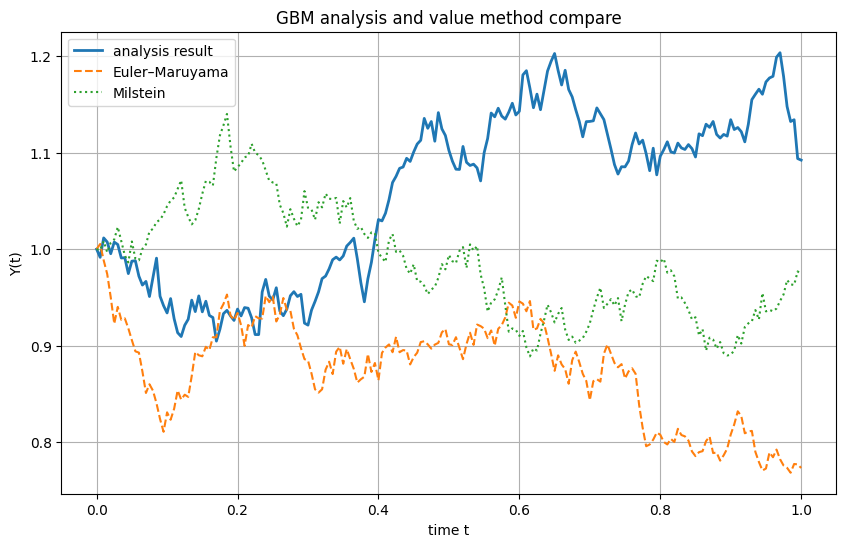

In [21]:
def gbm_euler(y0, mu, sigma, T, N):
    """Euler-Maruyama数值解"""
    dt = T / N
    Y = np.zeros(N+1)
    Y[0] = y0
    for i in range(1, N+1):
        dW = np.sqrt(dt) * np.random.randn()
        Y[i] = Y[i-1] + mu*Y[i-1]*dt + sigma*Y[i-1]*dW
    return np.linspace(0, T, N+1), Y

def gbm_milstein(y0, mu, sigma, T, N):
    """Milstein数值解"""
    dt = T / N
    Y = np.zeros(N+1)
    Y[0] = y0
    for i in range(1, N+1):
        dW = np.sqrt(dt) * np.random.randn()
        Y[i] = Y[i-1] + mu*Y[i-1]*dt + sigma*Y[i-1]*dW + 0.5*sigma**2*Y[i-1]*(dW**2 - dt)
    return np.linspace(0, T, N+1), Y

# 对比三种解法
t, Y_analytical = sim.simulate_path(T, N)
_, Y_euler = gbm_euler(y0, mu, sigma, T, N)
_, Y_milstein = gbm_milstein(y0, mu, sigma, T, N)

plt.figure(figsize=(10,6))
plt.plot(t, Y_analytical, label="analysis result", lw=2)
plt.plot(t, Y_euler, '--', label="Euler–Maruyama")
plt.plot(t, Y_milstein, ':', label="Milstein")
plt.legend()
plt.xlabel("time t")
plt.ylabel("Y(t)")
plt.title("GBM analysis and value method compare")
plt.grid(True)
plt.show()
